<a href="https://colab.research.google.com/github/gtmray/PyTorch-Fashion-MNIST/blob/master/TORCH_PROJECT_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import time
import plotly.figure_factory as ff
try:
  import chart_studio.plotly as py
except ModuleNotFoundError:
  !pip install chart-studio
from tqdm import tqdm

     |████████████████████████████████| 71kB 2.6MB/s 


In [3]:
#Downloading datasets and transforming it to tensors
Transforms = transforms.Compose([transforms.ToTensor()])
train_dataset = dsets.FashionMNIST(root = './data', train=True, transform=Transforms, download=True)
test_dataset = dsets.FashionMNIST(root='./data', train=False, transform=Transforms, download=True)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning:

The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.



In [0]:
#Loading datasets
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=True)

In [0]:
# #print(train_dataset.targets.bincount()) #Equal values of targets
# sample = next(iter(train_loader)) #Load first 100 images with labels
# images, labels = sample
# grid = torchvision.utils.make_grid(images, nrow=10) #creates a single image containing all passed image tensors as a grid (batch size=100 
#                                                     #will display 100 images))
# plt.figure(figsize=(15, 15))
# plt.imshow(np.transpose(grid, (1, 2, 0))) #tranposing by manual way (1, 2, 0)

In [0]:
def plot_confusion_matrix(matrix):
      try : 
        import chart_studio
      except ImportError:
        !pip install chart-studio

      #chart_studio.tools.set_credentials_file(username='raygtm', api_key='Gi1F46rnray1qGk83fFz4e9') #for plotting in site

      x = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
      y = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

      z_text = [[str(y) for y in x] for x in matrix] #For annotation it should be string
      fig = ff.create_annotated_heatmap(matrix, x=x, y=y, annotation_text=z_text, colorscale='Viridis')
      fig.update_layout(title_text='<i><b>Confusion matrix</b></i>')
      fig['data'][0]['showscale'] = True #For displaying color scale 
      fig.show()

      #py.iplot(fig, filename='Confusion FMNIST') #To plot/edit in plotly web (chart studio)

In [7]:
def show_image(dataset, num):
    plt.figure(figsize=(num/2,num/2))
    for i in range(num):
        plt.subplot(num/5,num/5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(dataset.data[i], cmap=plt.cm.binary) #Cmap for grayscale image
        plt.xlabel(tensor_to_labels(dataset.targets[i])) #Labeling all the images
    plt.show()

In [0]:
def tensor_to_labels(tensor):
  '''GIVE ME TENSORS, I WILL RETURN YOU FASHION LABELS'''
  tensor = tensor.item()
  item_list = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
  return item_list[tensor]

def plot_with_time(acc_value_train, acc_value_test, training_time):
    '''PLOTTING ACCURACY VALUE OF TRAIN AND TEST DATA AND ALSO DISPLAY
    TIME FOR TRAINING THE MODEL'''
    plt.plot(acc_value_test, label="Accuracy of Test Data")
    plt.plot(acc_value_train, label="Accuracy of Training Data")
    plt.legend()
    plt.show()
    sec = training_time
    minutes = 0
    if training_time>=60:
      minutes = int(training_time/60)
      sec = training_time - minutes*60
    print("*********THE WHOLE TRAINING TOOK******** {}".format(minutes), "Minutes :::", "{:.3f} seconds!!!!!!!".format(sec))

In [0]:
#Network Model
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__() 
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) 
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

    self.batch1 = nn.BatchNorm2d(6)
    self.batch2 = nn.BatchNorm2d(12)

    self.linear1 = nn.Linear(in_features=12*4*4, out_features=50)
    self.out = nn.Linear(in_features =50, out_features=10)
  
  def forward(self, x):
    #conv1
    x = self.conv1(x)
    x = self.batch1(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2)

    #conv2
    x = self.conv2(x)
    x = self.batch2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2)

    #fc1
    x = x.view(-1, 12*4*4)
    #x = x.view(x.size(0), -1)
    x = self.linear1(x)
    x = F.relu(x)

    #out
    x = self.out(x)
    return x

In [0]:
def training_model(epochs, model, train_loader, test_loader, criterion, optimizer):
  loss_list = []
  accuracy_list_test = []
  accuracy_list_train = []
  for epoch in range(epochs):
    train_loss = 0
    test_accuracy = 0
    train_accuracy = 0
    correct_train = 0
    correct = 0
    y_conf = []
    y_hat_conf = []

    for x, y in tqdm(train_loader, position=0):
      model.train() #Training mode
      device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') #Using GPU if available
      x = x.to(device)
      y = y.to(device)
      optimizer.zero_grad()
      y_hat = model(x) #Prediction

      _, y_hat_test = torch.max(y_hat.data, 1) # _ = max values, y_hat = max values index
      correct_train += (y_hat_test==y).sum().item() #For calculating accuracy(not compulsory)
      accuracy_train = correct_train/len(train_dataset) 
    
      loss = criterion(y_hat, y) #Calculate loss
      train_loss += loss.item() 
      loss.backward() #Gradient of the loss
      optimizer.step() #Updating parameters(weights and bias)

    train_accuracy += accuracy_train
    accuracy_list_train.append(train_accuracy)

    for x, y in tqdm(test_loader, position=0):
      device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
      x = x.to(device)
      y = y.to(device)
      model.eval() #Evaluation mode (test)
      z = model(x)
      _, y_hat = torch.max(z.data, 1) # _ = max values, y_hat = max values index
      correct += (y_hat==y).sum().item()
      accuracy = correct/len(test_dataset)
      y_conf.append(y.tolist()) #Tensor to list (actual value)
      y_hat_conf.append(y_hat.tolist()) #Tensor to list (predicted value)

    y_real = [i for j in y_conf for i in j] #Flatten the nested list for confusion matrix
    y_pred = [i for j in y_hat_conf for i in j] #Flatten the nested list for confusion matrix
    confusion = confusion_matrix(y_real, y_pred)
    test_accuracy += accuracy
    
    print("                   ")
    print("*****************************************************************************************")
    print("Epoch: {}/{}".format(epoch+1, epochs), "Training loss: {:.3f}".format(train_loss/len(train_loader)),
          "Train Accuracy: {:.3f}".format(train_accuracy),"Test Accuracy: {:.3f}".format(test_accuracy))
    loss_list.append(train_loss/len(train_loader))
    accuracy_list_test.append(test_accuracy)
  
  plot_confusion_matrix(confusion)
  return loss_list, accuracy_list_train, accuracy_list_test

  1%|          | 6/600 [00:00<00:10, 55.95it/s]

                   
*****************************************************************************************
Epoch: 1/10 Training loss: 0.545 Train Accuracy: 0.803 Test Accuracy: 0.838


  1%|          | 7/600 [00:00<00:09, 60.71it/s]

                   
*****************************************************************************************
Epoch: 2/10 Training loss: 0.363 Train Accuracy: 0.867 Test Accuracy: 0.858


  1%|          | 6/600 [00:00<00:10, 57.02it/s]

                   
*****************************************************************************************
Epoch: 3/10 Training loss: 0.325 Train Accuracy: 0.881 Test Accuracy: 0.877


  1%|          | 6/600 [00:00<00:11, 53.67it/s]

                   
*****************************************************************************************
Epoch: 4/10 Training loss: 0.302 Train Accuracy: 0.888 Test Accuracy: 0.880


  1%|          | 6/600 [00:00<00:10, 59.33it/s]

                   
*****************************************************************************************
Epoch: 5/10 Training loss: 0.287 Train Accuracy: 0.894 Test Accuracy: 0.879


  1%|          | 5/600 [00:00<00:12, 49.38it/s]

                   
*****************************************************************************************
Epoch: 6/10 Training loss: 0.274 Train Accuracy: 0.899 Test Accuracy: 0.885


  1%|          | 6/600 [00:00<00:10, 58.25it/s]

                   
*****************************************************************************************
Epoch: 7/10 Training loss: 0.263 Train Accuracy: 0.904 Test Accuracy: 0.888


  1%|          | 5/600 [00:00<00:12, 49.25it/s]

                   
*****************************************************************************************
Epoch: 8/10 Training loss: 0.258 Train Accuracy: 0.904 Test Accuracy: 0.891


  1%|          | 6/600 [00:00<00:11, 52.48it/s]

                   
*****************************************************************************************
Epoch: 9/10 Training loss: 0.248 Train Accuracy: 0.909 Test Accuracy: 0.889


100%|██████████| 100/100 [00:01<00:00, 65.07it/s]


                   
*****************************************************************************************
Epoch: 10/10 Training loss: 0.244 Train Accuracy: 0.909 Test Accuracy: 0.892


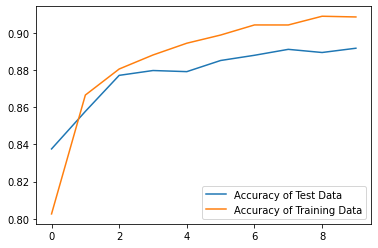

*********THE WHOLE TRAINING TOOK******** 2 Minutes ::: 2.092 seconds!!!!!!!


In [11]:
epochs = 10
model = Net()
model = model.to(torch.device('cuda:0')) #Using GPU
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

now1 = time.time() #Before training time
loss_train, acc_value_train, acc_value_test = training_model(epochs, model, train_loader, test_loader, criterion, optimizer)
now2 = time.time() #After training time
training_time = now2-now1 

plot_with_time(acc_value_train, acc_value_test, training_time)

In [0]:
torch.save(model.state_dict(), 'Fashion check.pth')